In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

import pandas as pd
import sklearn.preprocessing as pp
from sqlalchemy import create_engine
from pandas.io import sql
import requests, csv
import datetime

txns = pd.read_csv('txns_regression_features.csv')

In [3]:
features0 = ['rn','hasemail','fb_friends','e_viptier','credits',
 'e_level','ooc_56_49d','ooc_49_42d','ooc_42_35d','ooc_35_28d',
 'ooc_28_21d','ooc_21_14d','ooc_14_7d','ooc_7_6d','ooc_6_5d',
 'ooc_5_4d','ooc_4_3d','ooc_3_2d','ooc_2_1d','ooc_1_0d','ss_56_49d',
 'ss_49_42d','ss_42_35d','ss_35_28d','ss_28_21d','ss_21_14d','ss_14_7d',
 'ss_7_6d','ss_6_5d','ss_5_4d','ss_4_3d','ss_3_2d','ss_2_1d','ss_1_0d',
 'hb_56_49d','hb_49_42d','hb_42_35d','hb_35_28d','hb_28_21d','hb_21_14d',
 'hb_14_7d','hb_7_6d','hb_6_5d','hb_5_4d','hb_4_3d','hb_3_2d','hb_2_1d',
 'hb_1_0d','qw_56_49d','qw_49_42d','qw_42_35d','qw_35_28d','qw_28_21d',
 'qw_21_14d','qw_14_7d','qw_7_6d','qw_6_5d','qw_5_4d','qw_4_3d','qw_3_2d',
 'qw_2_1d','qw_1_0d','sp_56_49d','sp_49_42d','sp_42_35d','sp_35_28d',
 'sp_28_21d','sp_21_14d','sp_14_7d','sp_7_6d','sp_6_5d','sp_5_4d','sp_4_3d',
 'sp_3_2d','sp_2_1d','sp_1_0d','lu_56_49d','lu_49_42d','lu_42_35d',
 'lu_35_28d','lu_28_21d','lu_21_14d','lu_14_7d','lu_7_6d','lu_6_5d',
 'lu_5_4d','lu_4_3d','lu_3_2d','lu_2_1d','lu_1_0d','pv_56_49d','pv_49_42d',
 'pv_42_35d','pv_35_28d','pv_28_21d','pv_21_14d','pv_14_7d','pv_7_6d',
 'pv_6_5d','pv_5_4d','pv_4_3d','pv_3_2d','pv_2_1d','pv_1_0d','rev_56_49d',
 'rev_49_42d','rev_42_35d','rev_35_28d','rev_28_21d','rev_21_14d',
 'rev_14_7d','rev_7_6d','rev_6_5d','rev_5_4d','rev_4_3d','rev_3_2d',
 'rev_2_1d','rev_1_0d','chb_56_49d','chb_49_42d','chb_42_35d','chb_35_28d',
 'chb_28_21d','chb_21_14d','chb_14_7d','chb_7_6d','chb_6_5d','chb_5_4d',
 'chb_4_3d','chb_3_2d','chb_2_1d','chb_1_0d','oocRange', 'ssRange', 'hbRange',
 'qwRange', 'spinsRange','luRange','purchaseRange','revRange','bonusRange',
 'ooc_1wkprior','ss_1wkprior','hb_1wkprior','qw_1wkprior','sp_1wkprior','lu_1wkprior',
 'pv_1wkprior','rev_1wkprior','chb_1wkprior','ooc_2wkprior','ss_2wkprior','hb_2wkprior',
 'qw_2wkprior','sp_2wkprior','lu_2wkprior','pv_2wkprior','rev_2wkprior',
 'chb_2wkprior','ooc_3dprior','ss_3dprior','hb_3dprior','qw_3dprior','sp_3dprior',
 'lu_3dprior','pv_3dprior','rev_3dprior','chb_3dprior','e_viptier_pow2','e_level_pow2']

In [4]:
data = pd.DataFrame(pp.scale(txns[features0]))
data.columns = features0

data['revnext7days'] = txns['revnext7days']
data['revnext14days'] = txns['revnext14days']
data['revnext30days'] = txns['revnext30days']
data['e_purchaseamount'] = txns['e_purchaseamount']
data['rev'] = txns['rev']

In [5]:
#Find statistics on targets:

print("rev")
print("Num of Unique Values: ",np.unique(data.as_matrix(columns = ['rev'])).size)
print("Min: ",min(float(s) for s in np.unique(data.as_matrix(columns = ['rev']))))
print("Max: ",max(float(s) for s in np.unique(data.as_matrix(columns = ['rev']))))
print("Mean: ",np.mean(data['rev']))
print("STD: ", np.std(data['rev']))
print("\n")
print("revnext7days")
print("Num of Unique Values: ",np.unique(data.as_matrix(columns = ['revnext7days'])).size)
print("Min: ",min(float(s) for s in np.unique(data.as_matrix(columns = ['revnext7days']))))
print("Max: ",max(float(s) for s in np.unique(data.as_matrix(columns = ['revnext7days']))))
print("Mean: ",np.mean(data['revnext7days']))
print("STD: ", np.std(data['revnext7days']))
print("\n")
print("revnext14days")
print("Num of Unique Values: ",np.unique(data.as_matrix(columns = ['revnext14days'])).size)
print("Min: ",min(float(s) for s in np.unique(data.as_matrix(columns = ['revnext14days']))))
print("Max: ",max(float(s) for s in np.unique(data.as_matrix(columns = ['revnext14days']))))
print("Mean: ",np.mean(data['revnext14days']))
print("STD: ", np.std(data['revnext14days']))
print("\n")
print("revnext30days")
print("Num of Unique Values: ",np.unique(data.as_matrix(columns = ['revnext30days'])).size)
print("Min: ",min(float(s) for s in np.unique(data.as_matrix(columns = ['revnext30days']))))
print("Max: ",max(float(s) for s in np.unique(data.as_matrix(columns = ['revnext30days']))))
print("Mean: ",np.mean(data['revnext30days']))
print("STD: ", np.std(data['revnext30days']))

rev
Num of Unique Values:  7
Min:  0.99
Max:  99.99
Mean:  15.3117839423182
STD:  20.901984269892953


revnext7days
Num of Unique Values:  8807
Min:  0.0
Max:  19998.0
Mean:  243.06981935807994
STD:  1050.4698117634953


revnext14days
Num of Unique Values:  11937
Min:  0.0
Max:  25297.47
Mean:  374.1718336942373
STD:  1661.676840886765


revnext30days
Num of Unique Values:  14458
Min:  0.0
Max:  35796.42
Mean:  468.70764959838834
STD:  2046.7986870870348


# Initial Try with Linear Regression 

In [6]:
#Perform linear regression and output analysis
#df: dataframe
#features: list of features to use
#target_feature: name of target (ie 'e_purchaseamount' or 'rev')
def regression_analysis(df, features, target_feature): 
    
    from sklearn.cross_validation import train_test_split
    from sklearn import linear_model
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error

    x_train, x_test, y_train, y_test = train_test_split(df[features],df[[target_feature]], test_size=0.33, random_state=1)
    
    regr = linear_model.LinearRegression(normalize=True)
    
    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # The mean square error
    print("Mean Square Error: %.2f"
    % np.mean((regr.predict(x_test) - y_test) ** 2))
    
    # The root mean square error
    print("Root Mean Square Error: %.2f"
    % np.sqrt(np.mean((regr.predict(x_test) - y_test) ** 2)))
     
    # Explained variance score: 1 is perfect prediction
    print('Variance score (coef of determination R^2 of the prediction): %.2f' % regr.score(x_test, y_test))
    
    coef = pd.DataFrame(data=regr.coef_.transpose(),index=features)
    coef.columns = ['value']
    print("Top Model Coefficients:")
    print(coef.reindex(coef.value.abs().sort_values(ascending=False).index)[0:35])
    
    
    %matplotlib inline
    fig = plt.figure(figsize=(18,12), dpi=1600) 
    xplot = np.array(range(0, len(coef.value)))
    yplot = coef.value.sort_values(ascending=False).values
     
    
   
    plt.scatter(xplot, yplot)
    plt.title("Regression Coefficients")
    plt.xlabel('Index')
    plt.ylabel('Regression Coefficients')
    plt.show()
    
    error = regr.predict(x_test)-y_test
    
    fig = plt.figure(figsize=(18,12), dpi=1600) 
    plt.subplot2grid((2,3),(0,0), colspan=3)   
    plt.scatter(np.array(range(0, len(x_test))),error)
    plt.title("Error versus Sample Index")
    plt.xlabel('Sample Index')
    plt.ylabel('Error')
    plt.show()
    
    #Takes a long time
    #fig = plt.figure(figsize=(18,12), dpi=1600) 
    #plt.subplot2grid((2,3),(0,0), colspan=3)   
    #plt.hist(error, bins=np.arange(min(error), max(error) + 25000, 25000))
    #plt.xlabel('Error')
    #plt.ylabel('Count')
    #plt.title('Histogram of Errors')
    #plt.show()



Mean Square Error: 305158.54
Root Mean Square Error: 552.41
Variance score (coef of determination R^2 of the prediction): 0.72
Top Model Coefficients:
                     value
pv_3dprior   -4.361649e+13
rev_1wkprior  4.273712e+13
ooc_2wkprior  4.185347e+13
sp_1wkprior  -3.820762e+13
lu_2wkprior   2.702927e+13
rev_3dprior  -2.644460e+13
chb_2wkprior  2.377382e+13
ooc_14_7d    -2.170194e+13
pv_1_0d       2.162611e+13
ooc_3dprior  -1.862799e+13
sp_3dprior   -1.801746e+13
chb_3dprior  -1.791231e+13
sp_1_0d       1.666588e+13
sp_3_2d       1.606333e+13
qw_2wkprior   1.598377e+13
ss_2wkprior   1.578418e+13
sp_2_1d       1.574186e+13
pv_2_1d       1.541118e+13
sp_2wkprior  -1.444585e+13
pv_3_2d       1.416104e+13
lu_14_7d     -1.397223e+13
qw_1wkprior  -1.334422e+13
chb_14_7d    -1.273204e+13
pv_2wkprior   1.060453e+13
ooc_1wkprior  9.951571e+12
sp_4_3d       8.654937e+12
ss_1wkprior   8.286660e+12
ss_14_7d     -8.260016e+12
sp_7_6d       8.181711e+12
ss_3dprior   -8.138018e+12
sp_6_5d     

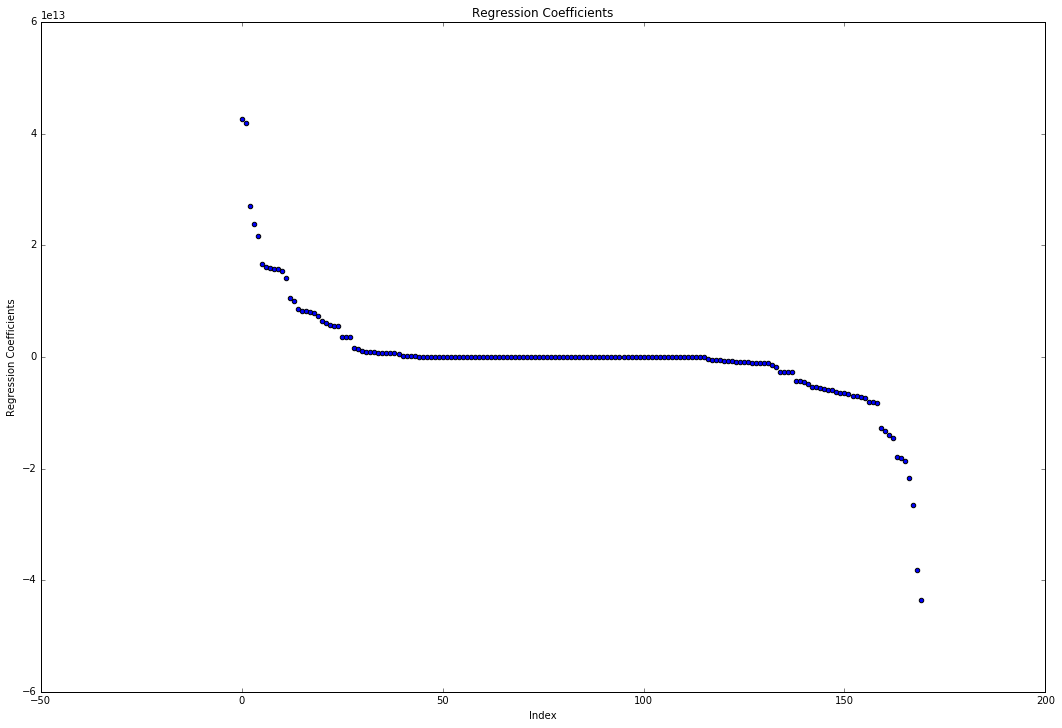

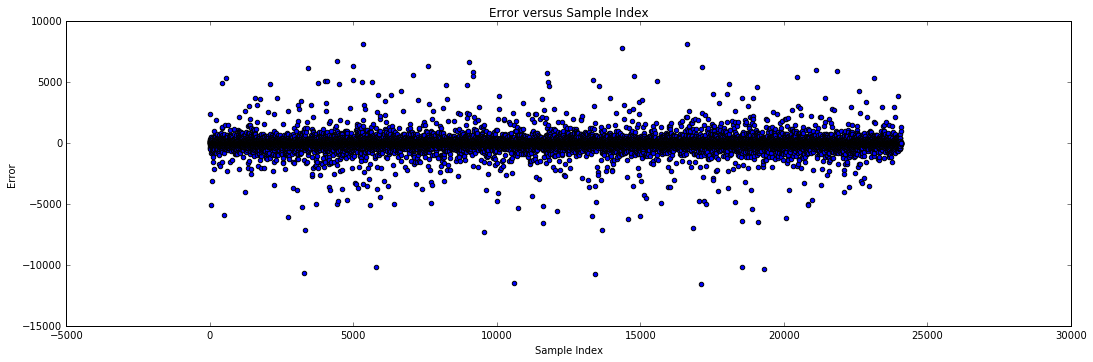

In [61]:
regression_analysis(data, features0, 'revnext7days')

Mean Square Error: 756129.30
Root Mean Square Error: 869.56
Variance score (coef of determination R^2 of the prediction): 0.73
Top Model Coefficients:
                     value
pv_3dprior   -4.470917e+13
rev_1wkprior  4.380777e+13
ooc_2wkprior  4.290198e+13
sp_1wkprior  -3.916479e+13
lu_2wkprior   2.770640e+13
rev_3dprior  -2.710709e+13
chb_2wkprior  2.436940e+13
ooc_14_7d    -2.224562e+13
pv_1_0d       2.216789e+13
ooc_3dprior  -1.909466e+13
sp_3dprior   -1.846884e+13
chb_3dprior  -1.836105e+13
sp_1_0d       1.708339e+13
sp_3_2d       1.646575e+13
qw_2wkprior   1.638420e+13
ss_2wkprior   1.617960e+13
sp_2_1d       1.613623e+13
pv_2_1d       1.579726e+13
sp_2wkprior  -1.480774e+13
pv_3_2d       1.451580e+13
lu_14_7d     -1.432226e+13
qw_1wkprior  -1.367852e+13
chb_14_7d    -1.305100e+13
pv_2wkprior   1.087020e+13
ooc_1wkprior  1.020088e+13
sp_4_3d       8.871760e+12
ss_1wkprior   8.494257e+12
ss_14_7d     -8.466946e+12
sp_7_6d       8.386680e+12
ss_3dprior   -8.341891e+12
sp_6_5d     

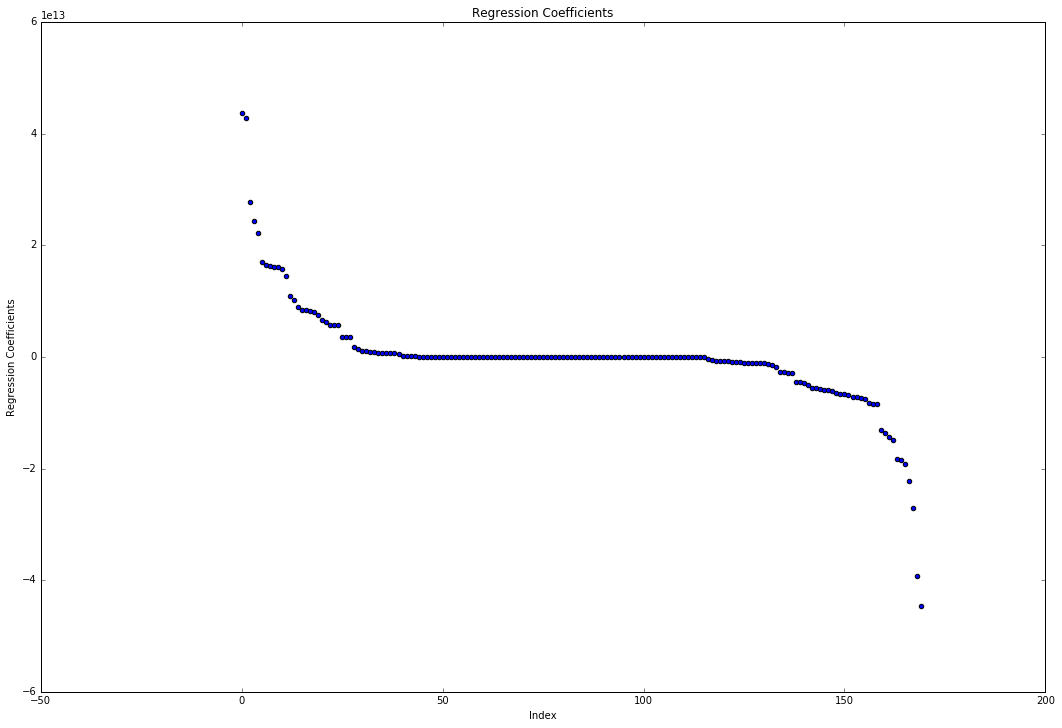

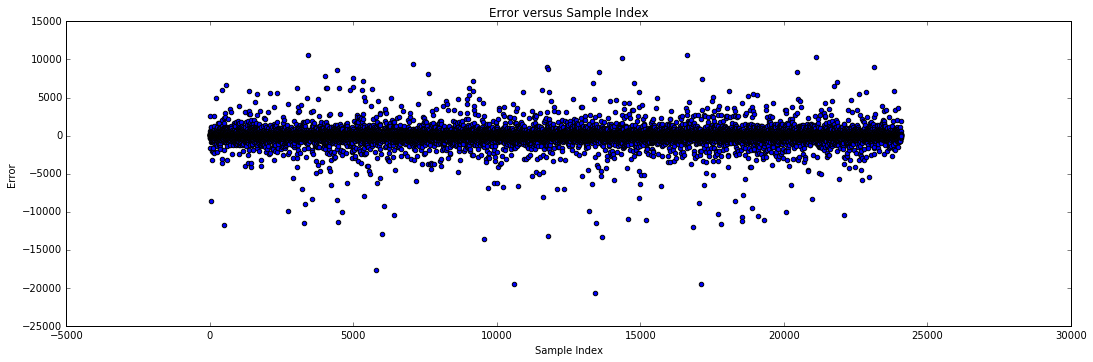

In [62]:
regression_analysis(data, features0, 'revnext14days')

Mean Square Error: 1265340.06
Root Mean Square Error: 1124.87
Variance score (coef of determination R^2 of the prediction): 0.70
Top Model Coefficients:
                     value
pv_3dprior   -5.852959e+13
rev_1wkprior  5.734954e+13
ooc_2wkprior  5.616376e+13
sp_1wkprior  -5.127134e+13
lu_2wkprior   3.627095e+13
rev_3dprior  -3.548639e+13
chb_2wkprior  3.190243e+13
ooc_14_7d    -2.912214e+13
pv_1_0d       2.902039e+13
ooc_3dprior  -2.499716e+13
sp_3dprior   -2.417789e+13
chb_3dprior  -2.403678e+13
sp_1_0d       2.236418e+13
sp_3_2d       2.155561e+13
qw_2wkprior   2.144885e+13
ss_2wkprior   2.118101e+13
sp_2_1d       2.112423e+13
pv_2_1d       2.068048e+13
sp_2wkprior  -1.938509e+13
pv_3_2d       1.900290e+13
lu_14_7d     -1.874953e+13
qw_1wkprior  -1.790680e+13
chb_14_7d    -1.708530e+13
pv_2wkprior   1.423038e+13
ooc_1wkprior  1.335415e+13
sp_4_3d       1.161418e+13
ss_1wkprior   1.111999e+13
ss_14_7d     -1.108423e+13
sp_7_6d       1.097915e+13
ss_3dprior   -1.092052e+13
sp_6_5d   

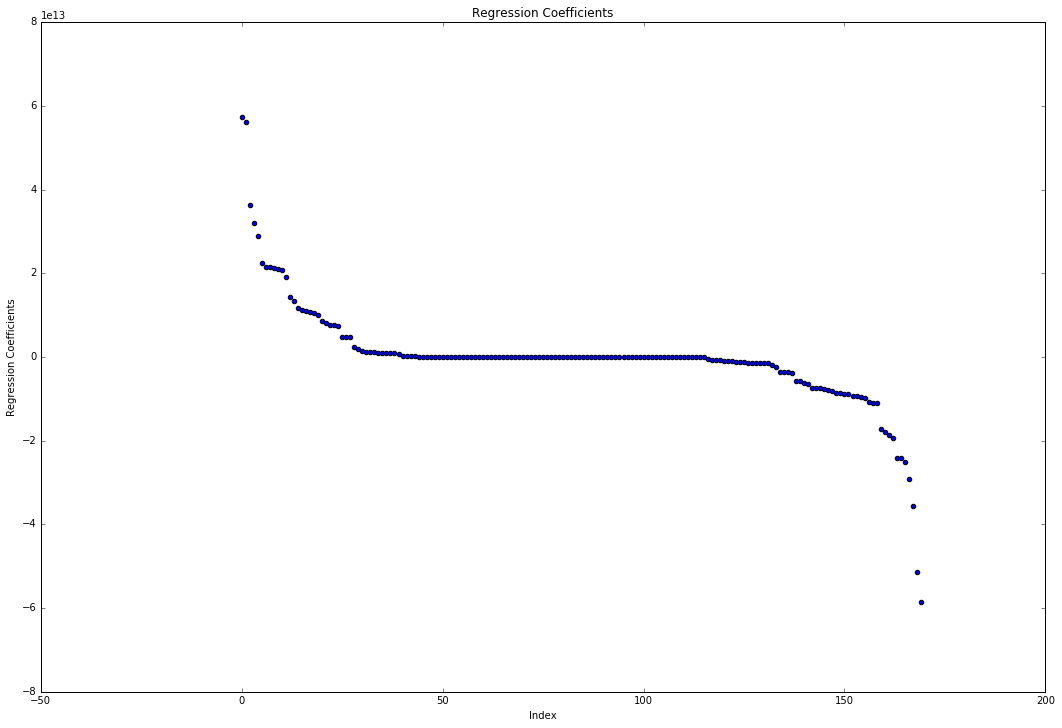

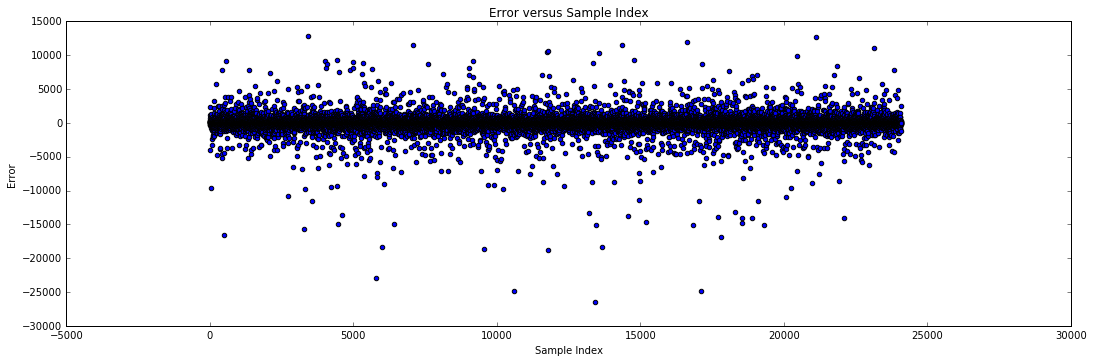

In [63]:
regression_analysis(data,features0,'revnext30days')

In [9]:
#Can we just look at numbers for the weeks prior?
features_1wkprior = ['ooc_1wkprior','ss_1wkprior','hb_1wkprior','qw_1wkprior','sp_1wkprior','lu_1wkprior',
 'pv_1wkprior','rev_1wkprior','chb_1wkprior','e_viptier','e_level']
features_2wkprior = ['ooc_2wkprior','ss_2wkprior','hb_2wkprior',
 'qw_2wkprior','sp_2wkprior','lu_2wkprior','pv_2wkprior','rev_2wkprior',
 'chb_2wkprior','e_viptier','e_level' ]
features_3dprior = ['ooc_3dprior','ss_3dprior','hb_3dprior','qw_3dprior','sp_3dprior',
 'lu_3dprior','pv_3dprior','rev_3dprior','chb_3dprior','e_viptier','e_level']

Mean Square Error: 516239.48
Root Mean Square Error: 718.50
Variance score (coef of determination R^2 of the prediction): 0.53
Top Model Coefficients:
                  value
rev_3dprior  710.189569
sp_3dprior  -216.541819
lu_3dprior   144.232469
qw_3dprior   124.070563
e_level       80.151226
chb_3dprior  -68.844327
ss_3dprior    58.379020
e_viptier     36.242218
hb_3dprior    35.364500
ooc_3dprior  -33.412661
pv_3dprior    -1.084578


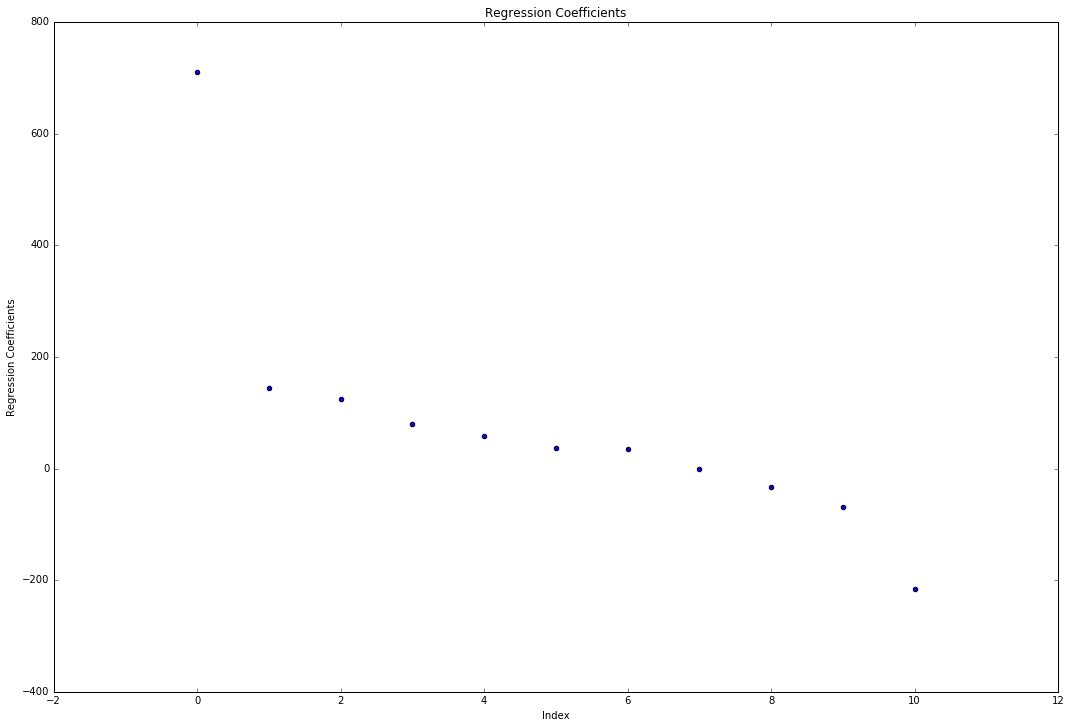

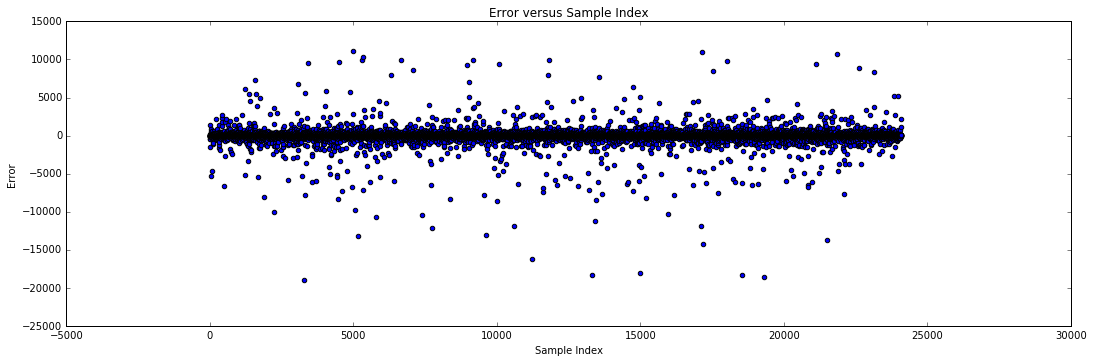

In [81]:
regression_analysis(data,features_3dprior,'revnext7days')

Mean Square Error: 527859.85
Root Mean Square Error: 726.54
Variance score (coef of determination R^2 of the prediction): 0.52
Top Model Coefficients:
                   value
rev_1wkprior  717.433274
sp_1wkprior  -151.250326
qw_1wkprior   109.112522
chb_1wkprior -105.577647
lu_1wkprior    72.601591
ss_1wkprior    66.733287
e_level        66.033127
e_viptier      40.332748
hb_1wkprior    30.698932
ooc_1wkprior  -25.341796
pv_1wkprior    -7.587621


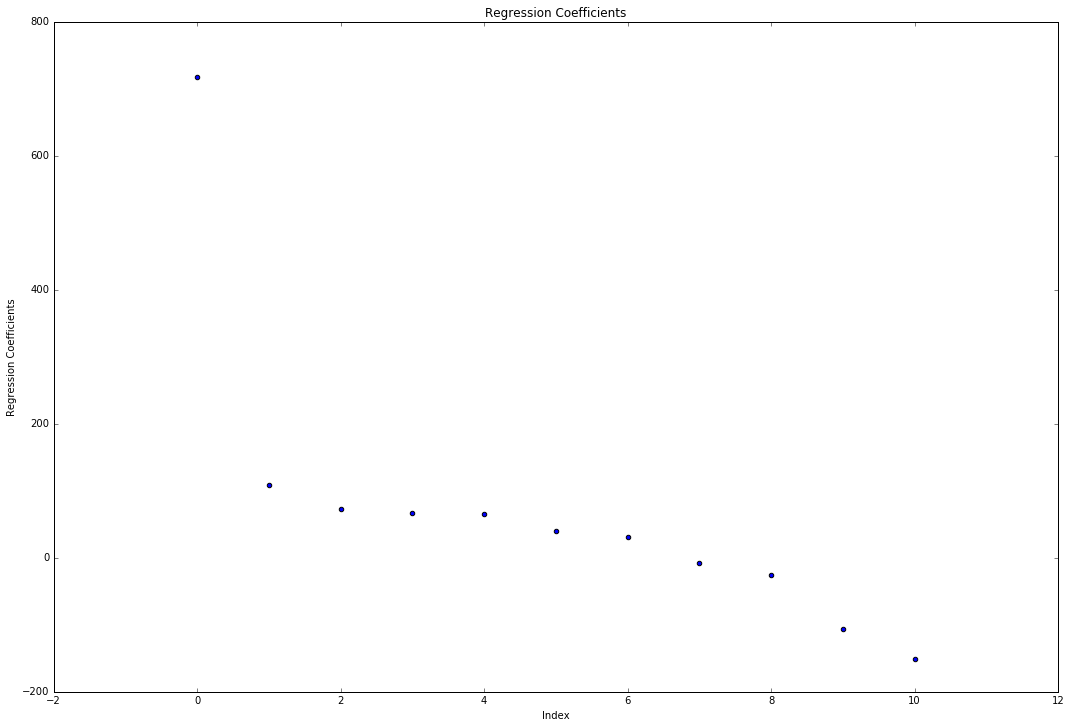

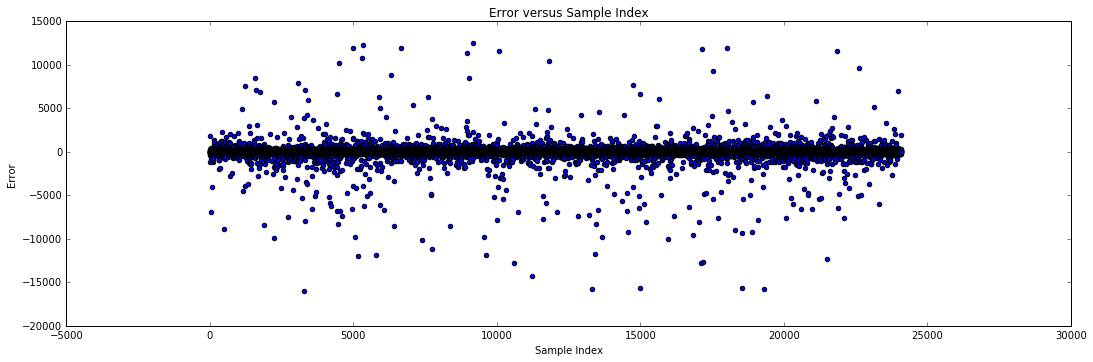

In [82]:
regression_analysis(data,features_1wkprior,'revnext7days')

Mean Square Error: 539094.07
Root Mean Square Error: 734.23
Variance score (coef of determination R^2 of the prediction): 0.51
Top Model Coefficients:
                   value
rev_2wkprior  694.438695
sp_2wkprior  -156.938611
qw_2wkprior   151.016225
chb_2wkprior -125.155093
ss_2wkprior    69.566929
e_viptier      63.751670
e_level        35.550130
ooc_2wkprior  -20.221682
lu_2wkprior    18.442780
hb_2wkprior    15.211700
pv_2wkprior    -6.576176


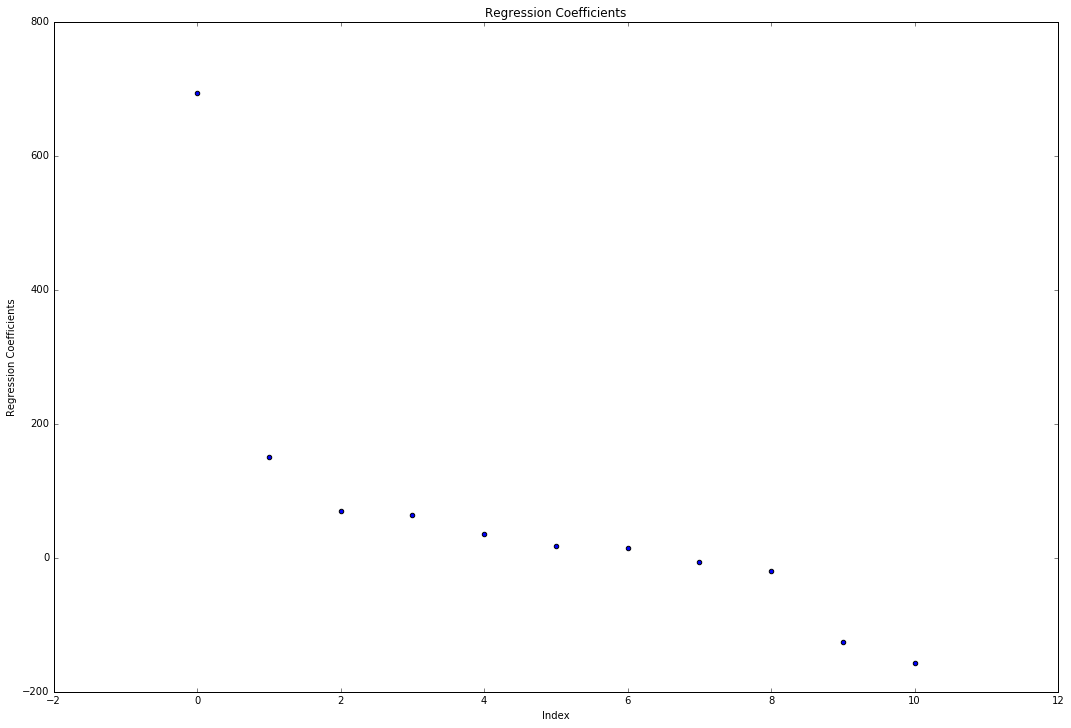

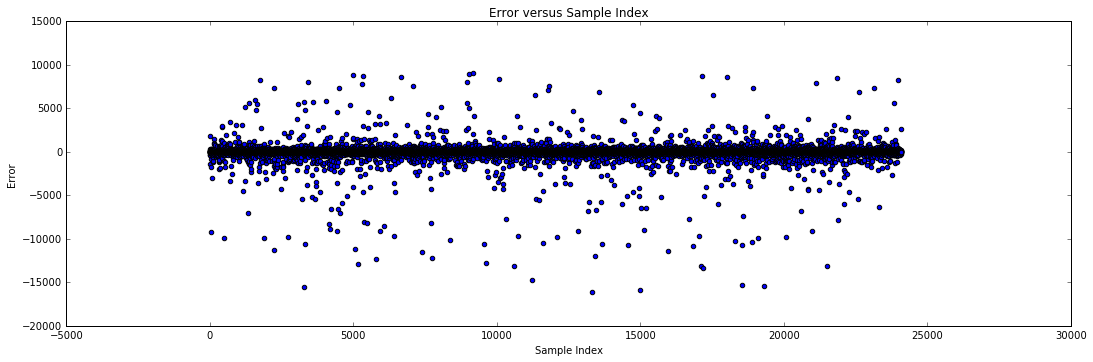

In [83]:
regression_analysis(data,features_2wkprior,'revnext7days')

# Decision Tree Regression

In [148]:
def decision_tree_regression_analysis(df, feature_list, target):
    from sklearn import tree
    from sklearn.cross_validation import train_test_split
    
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error

    x_train, x_test, y_train, y_test = train_test_split(df[feature_list],df[target], test_size=0.33, random_state=1)
   
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_test)
    
    # The residual sum of squares
    print("Residual Sum of Squares: %.2f"
    % np.sum((y_pred - y_test) ** 2))
    
     # The mean square error
    print("Mean Square Error: %.2f"
    % np.mean((y_pred - y_test) ** 2))
    
    # The root mean square error
    print("Root Mean Square Error: %.2f"
    % np.sqrt(np.mean((y_pred - y_test) ** 2)))
    
    # Explained variance score: 1 is perfect prediction
    r2 = clf.score(x_test, y_test)
    print("R2 Variance: %.2f"
    % r2)

    num_p =len(feature_list)
    num_n =df[target].shape[0]
    adjp = r2-((1-r2)*(float(num_p)/float(num_n - num_p - 1)))
    # Adjusted R2 to account for number of predictors/parameters = R^2 - (1-R^2)*(P/(N-P-1))
    print("Adjusted R2 Variance: %.2f"
    % adjp)


    
    error = y_pred-y_test
    fig = plt.figure(figsize=(18,12), dpi=1600) 
    plt.subplot2grid((2,3),(0,0), colspan=3)   
    plt.scatter(np.array(range(0, len(x_test))),error)
    plt.title("Error versus Sample Index")
    plt.xlabel('Sample Index')
    plt.ylabel('Error')
    plt.show()
    
    
    print("Features ranked by importance:")
    print(pd.Series(clf.feature_importances_, index = feature_list).sort_values(ascending=False))
    

Residual Sum of Squares: 4502139736.39
Mean Square Error: 186981.47
Root Mean Square Error: 432.41
R2 Variance: 0.83
Adjusted R2 Variance: 0.83


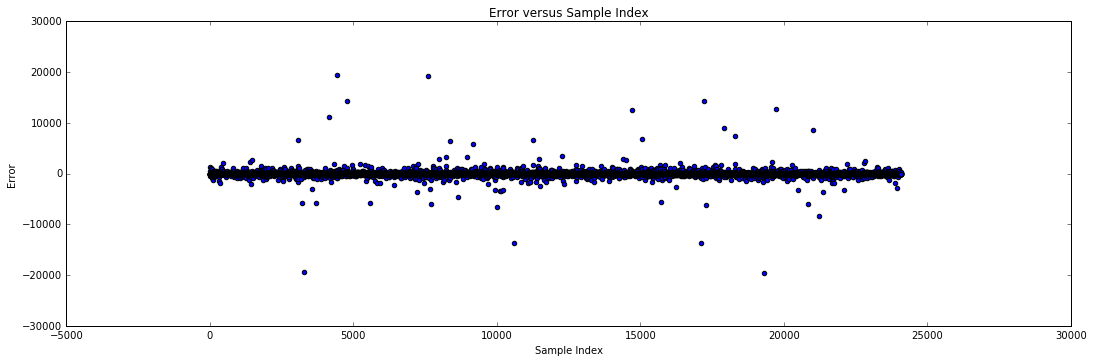

Features ranked by importance:
rev_3dprior    0.590467
e_level        0.104958
ooc_3dprior    0.089782
hb_3dprior     0.050521
sp_3dprior     0.042482
chb_3dprior    0.040100
ss_3dprior     0.027425
qw_3dprior     0.025523
lu_3dprior     0.016711
pv_3dprior     0.007268
e_viptier      0.004764
dtype: float64


In [149]:
decision_tree_regression_analysis(data, features_3dprior, 'revnext7days')

Residual Sum of Squares: 1197591005.04
Mean Square Error: 49737.98
Root Mean Square Error: 223.02
R2 Variance: 0.95
Adjusted R2 Variance: 0.95


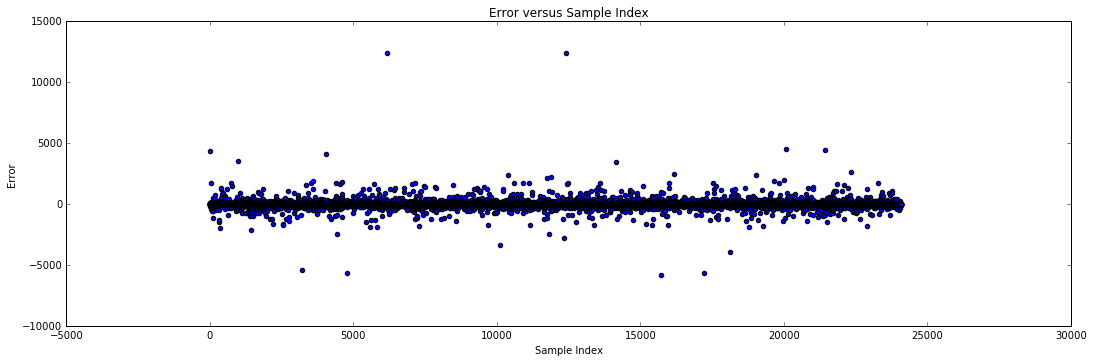

Features ranked by importance:
rev_1wkprior    0.641174
ooc_1wkprior    0.070361
sp_1wkprior     0.067078
ss_1wkprior     0.052113
chb_1wkprior    0.044200
e_level         0.041747
hb_1wkprior     0.039280
qw_1wkprior     0.018179
lu_1wkprior     0.014117
pv_1wkprior     0.010276
e_viptier       0.001475
dtype: float64


In [150]:
decision_tree_regression_analysis(data, features_1wkprior, 'revnext7days')

Residual Sum of Squares: 783042703.84
Mean Square Error: 32521.09
Root Mean Square Error: 180.34
R2 Variance: 0.97
Adjusted R2 Variance: 0.97


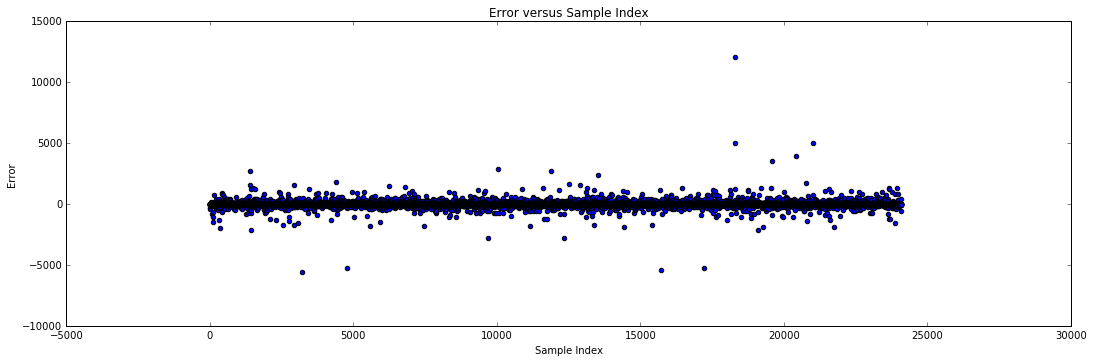

Features ranked by importance:
rev_2wkprior    0.568916
sp_2wkprior     0.165860
hb_2wkprior     0.083049
chb_2wkprior    0.061272
e_level         0.030524
ooc_2wkprior    0.025215
pv_2wkprior     0.020792
lu_2wkprior     0.016021
qw_2wkprior     0.014315
ss_2wkprior     0.011624
e_viptier       0.002412
dtype: float64


In [151]:
decision_tree_regression_analysis(data, features_2wkprior, 'revnext7days')

Residual Sum of Squares: 5991912172.36
Mean Square Error: 248854.23
Root Mean Square Error: 498.85
R2 Variance: 0.94
Adjusted R2 Variance: 0.94


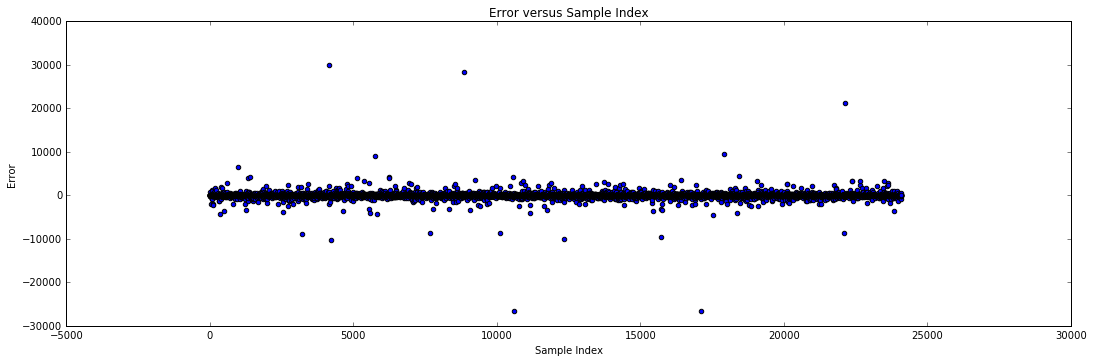

Features ranked by importance:
rev_2wkprior    0.547028
chb_2wkprior    0.105206
pv_2wkprior     0.090046
ss_2wkprior     0.088804
qw_2wkprior     0.044342
e_level         0.042450
hb_2wkprior     0.025505
sp_2wkprior     0.022486
ooc_2wkprior    0.021033
lu_2wkprior     0.010960
e_viptier       0.002141
dtype: float64


In [152]:
decision_tree_regression_analysis(data, features_2wkprior, 'revnext30days')

In [41]:
#Let's focus on predicting revenue for the next 7d based on features from the past 2 weeks
#decision_tree_regression_analysis(data, ['rev_2wkprior','chb_2wkprior','ss_2wkprior',
#                                'pv_2wkprior','qw_2wkprior','e_level','sp_2wkprior',
#                                'ooc_2wkprior','lu_2wkprior','hb_2wkprior','e_viptier' 
#                                ], 'revnext7days')

Residual Sum of Squares: 15032834757.46
Mean Square Error: 624339.01
Root Mean Square Error: 790.15
R2 Variance: 0.43
Adjusted R2 Variance: 0.43


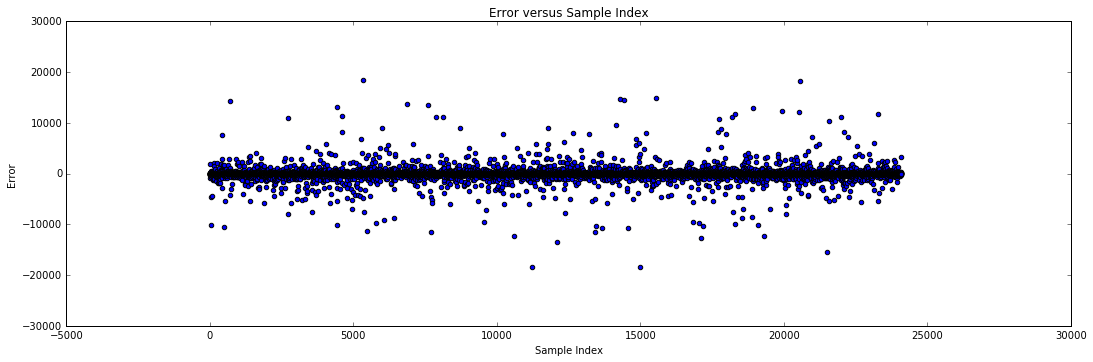

Features ranked by importance:
rev_2wkprior    1.0
dtype: float64


In [153]:
decision_tree_regression_analysis(data, ['rev_2wkprior'], 'revnext7days')

Residual Sum of Squares: 4972387461.65
Mean Square Error: 206511.65
Root Mean Square Error: 454.44
R2 Variance: 0.81
Adjusted R2 Variance: 0.81


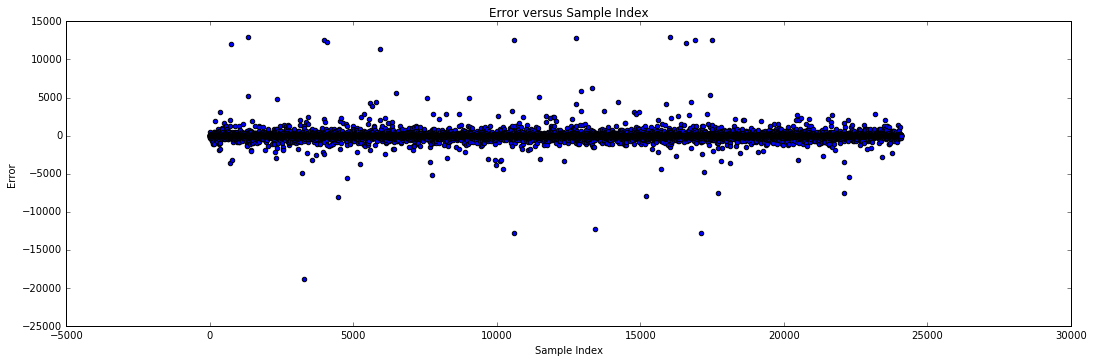

Features ranked by importance:
rev_2wkprior    0.718322
chb_2wkprior    0.281678
dtype: float64


In [154]:
decision_tree_regression_analysis(data, ['rev_2wkprior','chb_2wkprior'], 'revnext7days')

Residual Sum of Squares: 1989021733.48
Mean Square Error: 82607.43
Root Mean Square Error: 287.42
R2 Variance: 0.92
Adjusted R2 Variance: 0.92


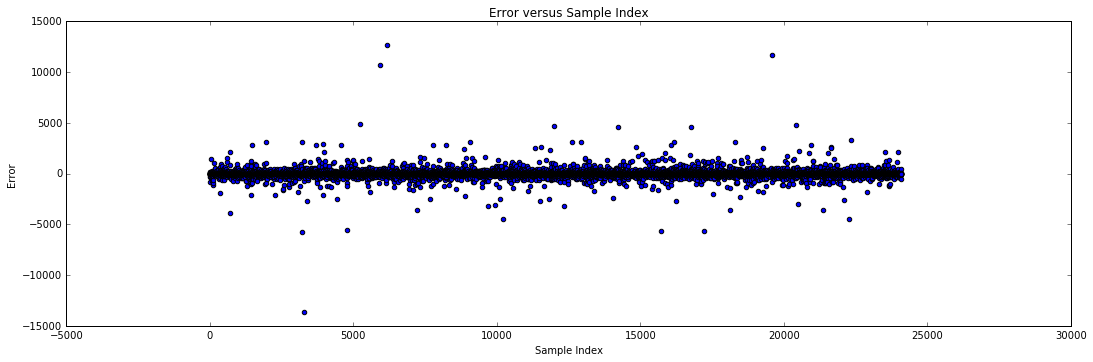

Features ranked by importance:
rev_2wkprior    0.661100
chb_2wkprior    0.204807
ss_2wkprior     0.134093
dtype: float64


In [155]:
decision_tree_regression_analysis(data, ['rev_2wkprior','chb_2wkprior','ss_2wkprior',
                                ], 'revnext7days')

We can keep adding in features to improve RSS, but can we only add necessary features that significantly improve RSS without overfitting the model?  

## Determine which features decrease RSS significantly (p < 0.5) with their addition to the model

In [193]:
#This function uses the F-test to determine which features significantly decrease RSS. 
        
def find_significant_decision_tree_regression_model(df, feature_list, target):
    from sklearn import tree
    from sklearn.cross_validation import train_test_split
    
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    from scipy.stats import distributions


    x_train, x_test, y_train, y_test = train_test_split(df[feature_list],df[target], test_size=0.33, random_state=1)
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(x_train, y_train)
    
    
    print("Features ranked by importance:")
    print(pd.Series(clf.feature_importances_, index = feature_list).sort_values(ascending=False))
    ranked_features=pd.Series(clf.feature_importances_, index = feature_list).sort_values(ascending=False).axes[0]
    last_sig_model_i = 0
    last_sig_model_RSS = 0.0
    last_sig_model_df = 0
    last_sig_model = tree.DecisionTreeRegressor()
    print("Iterating through features to identify which ones significantly decrease Residual Sum of Squares")
    for feature_i in range(1,len(ranked_features)+1):
        print("_____________________________________")
        print('Testing features: ',ranked_features[0:feature_i].tolist())
        curr_feature_list = ranked_features[0:feature_i].tolist()
       
        x_train, x_test, y_train, y_test = train_test_split(df[curr_feature_list],df[target], test_size=0.33, random_state=1)
      
        clf = tree.DecisionTreeRegressor()
        clf = clf.fit(x_train, y_train)
    
        y_pred = clf.predict(x_test)
        curr_RSS = np.sum((y_pred - y_test) ** 2)
        print("RSS: ",curr_RSS)
        r2 = clf.score(x_test, y_test)
        print("R2 Variance: %.2f" % r2)
        
        n = x_train.shape[0]
        v = feature_i
        curr_df = n-v
        
        if(feature_i<=1):
            last_sig_model_i=feature_i
            last_sig_model_RSS = curr_RSS
            last_sig_model_df = curr_df
            
        else:
            fstat = (float(last_sig_model_RSS-curr_RSS)/float(last_sig_model_df-curr_df))/float(curr_RSS/curr_df)
            x = distributions.f.ppf(0.95, last_sig_model_df-curr_df, curr_df)
            if(fstat > x):
                last_sig_model_RSS = curr_RSS
                last_sig_model_df = curr_df
                last_sig_model_i = feature_i
                last_sig_model = clf
            
    
      
    print("______________________________________")        
    print("Best Model features: ", ranked_features[0:last_sig_model_i].tolist())
    print("Best Model RSS: ", last_sig_model_RSS)
    x_train, x_test, y_train, y_test = train_test_split(df[ranked_features[0:last_sig_model_i].tolist()],df[target], test_size=0.33, random_state=1)
    
    
    y_pred = last_sig_model.predict(x_test)
    print("Residual Sum of Squares: %.2f"
    % np.sum((y_pred - y_test) ** 2))
    
     # The mean square error
    print("Mean Square Error: %.2f"
    % np.mean((y_pred - y_test) ** 2))
    
    # The root mean square error
    print("Root Mean Square Error: %.2f"
    % np.sqrt(np.mean((y_pred - y_test) ** 2)))
    
    # Explained variance score: 1 is perfect prediction
    r2 = last_sig_model.score(x_test, y_test)
    print("R2 Variance: %.2f"
    % r2)


    error = y_pred-y_test
    fig = plt.figure(figsize=(18,12), dpi=1600) 
    plt.subplot2grid((2,3),(0,0), colspan=3)   
    plt.scatter(np.array(range(0, len(x_test))),error)
    plt.title("Error versus Sample Index")
    plt.xlabel('Sample Index')
    plt.ylabel('Error')
    plt.show()
    

Features ranked by importance:
rev_2wkprior    0.578044
sp_2wkprior     0.166801
hb_2wkprior     0.083749
chb_2wkprior    0.053348
e_level         0.026630
ooc_2wkprior    0.026015
lu_2wkprior     0.021158
ss_2wkprior     0.014306
pv_2wkprior     0.014000
qw_2wkprior     0.013507
e_viptier       0.002442
dtype: float64
Iterating through features to identify which ones significantly decrease Residual Sum of Squares
_____________________________________
Testing features:  ['rev_2wkprior']
RSS:  15032834757.457819
R2 Variance: 0.43
_____________________________________
Testing features:  ['rev_2wkprior', 'sp_2wkprior']
RSS:  3744110839.155746
R2 Variance: 0.86
_____________________________________
Testing features:  ['rev_2wkprior', 'sp_2wkprior', 'hb_2wkprior']
RSS:  1927648045.3085775
R2 Variance: 0.93
_____________________________________
Testing features:  ['rev_2wkprior', 'sp_2wkprior', 'hb_2wkprior', 'chb_2wkprior']
RSS:  1945432407.8163624
R2 Variance: 0.93
________________________

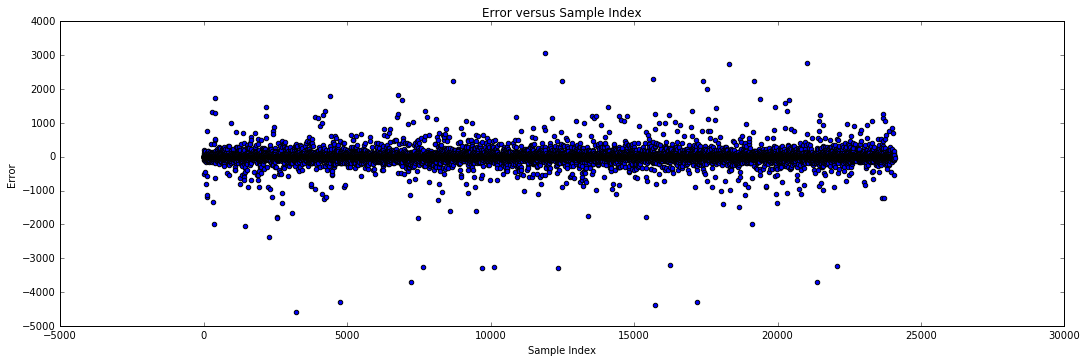

In [190]:
find_significant_decision_tree_regression_model(data, ['rev_2wkprior','chb_2wkprior','ss_2wkprior',
                                'pv_2wkprior','qw_2wkprior','e_level','sp_2wkprior',
                                'ooc_2wkprior','lu_2wkprior','hb_2wkprior','e_viptier' ], 'revnext7days')

# What if we throw all features in and see what comes out

Features ranked by importance:
rev_2wkprior    0.485749
qw_35_28d       0.131365
rev_3dprior     0.075732
sp_21_14d       0.069367
credits         0.039971
hb_1_0d         0.019841
rev_1wkprior    0.017937
ss_1_0d         0.017041
qw_28_21d       0.013649
ooc_56_49d      0.009709
pv_7_6d         0.009446
pv_35_28d       0.009065
pv_3dprior      0.008157
rev_28_21d      0.005760
chb_35_28d      0.005365
lu_14_7d        0.004620
pv_56_49d       0.004398
sp_2wkprior     0.004246
lu_2wkprior     0.004099
e_level         0.003991
sp_1_0d         0.003263
rev_14_7d       0.002884
lu_28_21d       0.002556
revRange        0.002386
e_level_pow2    0.002378
qw_6_5d         0.001927
sp_4_3d         0.001878
sp_56_49d       0.001644
ooc_21_14d      0.001427
qw_14_7d        0.001331
                  ...   
sp_28_21d       0.000051
ooc_5_4d        0.000050
ooc_14_7d       0.000050
ooc_2_1d        0.000048
ss_5_4d         0.000047
sp_49_42d       0.000045
ss_21_14d       0.000043
hb_3_2d         0.0

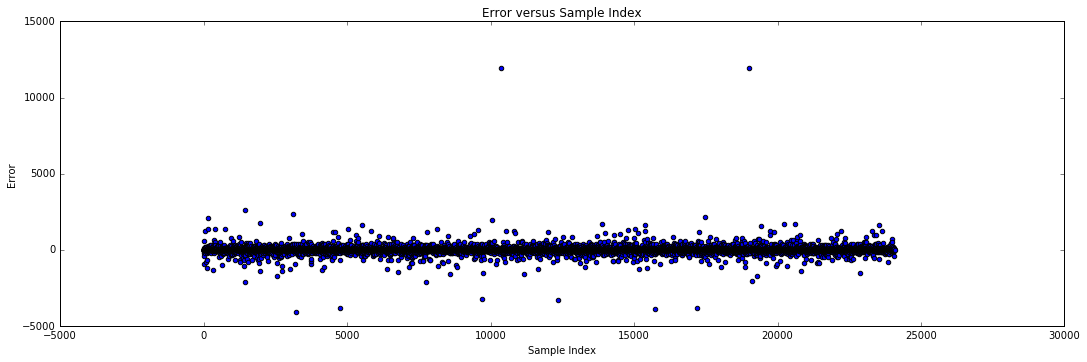

In [195]:
find_significant_decision_tree_regression_model(data, features0, 'revnext7days')

With many more parameters, it doesn't improve performance any better.  
Going back to our model with data from the past 2 weeks, let's look at E_level^2 to see if it performs better as a feature than E_level.

Features ranked by importance:
rev_2wkprior    0.576008
sp_2wkprior     0.162658
hb_2wkprior     0.087453
chb_2wkprior    0.060203
e_level_pow2    0.027052
ooc_2wkprior    0.025008
qw_2wkprior     0.022270
lu_2wkprior     0.013557
pv_2wkprior     0.012132
ss_2wkprior     0.011390
e_viptier       0.002269
dtype: float64
Iterating through features to identify which ones significantly decrease Residual Sum of Squares
_____________________________________
Testing features:  ['rev_2wkprior']
RSS:  15032834757.457819
R2 Variance: 0.43
_____________________________________
Testing features:  ['rev_2wkprior', 'sp_2wkprior']
RSS:  3507688995.5917625
R2 Variance: 0.87
_____________________________________
Testing features:  ['rev_2wkprior', 'sp_2wkprior', 'hb_2wkprior']
RSS:  2153481151.450243
R2 Variance: 0.92
_____________________________________
Testing features:  ['rev_2wkprior', 'sp_2wkprior', 'hb_2wkprior', 'chb_2wkprior']
RSS:  1974355151.3965921
R2 Variance: 0.92
________________________

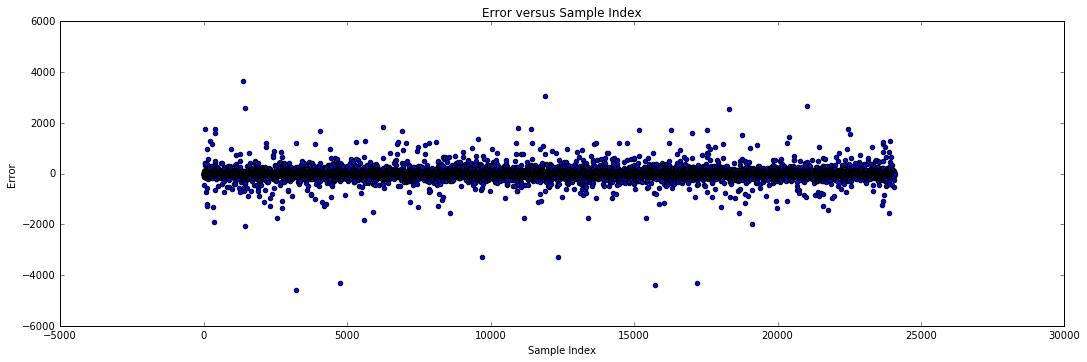

In [197]:
find_significant_decision_tree_regression_model(data, ['rev_2wkprior','chb_2wkprior','ss_2wkprior',
                                'pv_2wkprior','qw_2wkprior','e_level_pow2','sp_2wkprior',
                                'ooc_2wkprior','lu_2wkprior','hb_2wkprior','e_viptier' ], 'revnext7days')

The addition of E_level^2 seemed to improve the model predictions

Features ranked by importance:
rev_2wkprior    0.584555
sp_2wkprior     0.163781
hb_2wkprior     0.093090
chb_2wkprior    0.063312
e_level_pow2    0.028395
ooc_2wkprior    0.026982
qw_2wkprior     0.023398
lu_2wkprior     0.016487
dtype: float64
Iterating through features to identify which ones significantly decrease Residual Sum of Squares
_____________________________________
Testing features:  ['rev_2wkprior']
RSS:  15032834757.457819
R2 Variance: 0.43
_____________________________________
Testing features:  ['rev_2wkprior', 'sp_2wkprior']
RSS:  3510056134.973314
R2 Variance: 0.87
_____________________________________
Testing features:  ['rev_2wkprior', 'sp_2wkprior', 'hb_2wkprior']
RSS:  2453602291.6333084
R2 Variance: 0.91
_____________________________________
Testing features:  ['rev_2wkprior', 'sp_2wkprior', 'hb_2wkprior', 'chb_2wkprior']
RSS:  2087738105.5697074
R2 Variance: 0.92
_____________________________________
Testing features:  ['rev_2wkprior', 'sp_2wkprior', 'hb_2wkpri

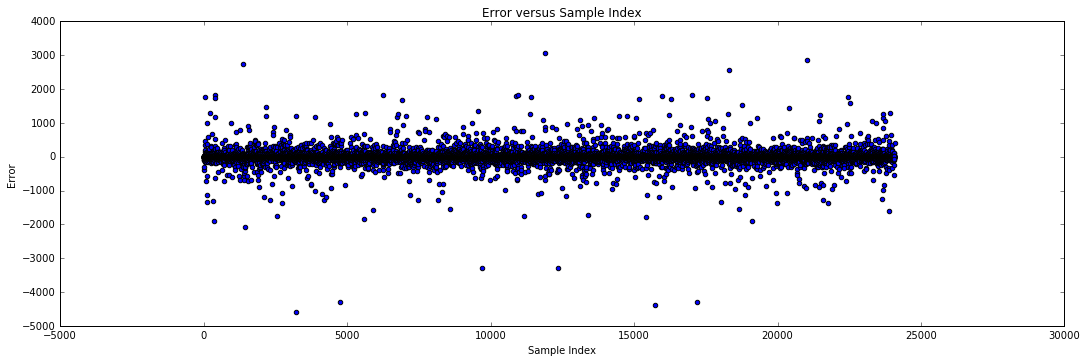

In [192]:
find_significant_decision_tree_regression_model(data, ['rev_2wkprior', 'sp_2wkprior', 'hb_2wkprior', 'chb_2wkprior', 'e_level_pow2', 'ooc_2wkprior', 'lu_2wkprior', 'qw_2wkprior'], 'revnext7days')

For predicting revnext7days, the most important features are ['rev_2wkprior', 'sp_2wkprior', 'hb_2wkprior', 'chb_2wkprior', 'e_level_pow2', 'ooc_2wkprior', 'qw_2wkprior', 'lu_2wkprior']